## 3.8. plot GO terms - pseudotime weighted genes

In this notebook we will plot the GO terms that we found in R script 3.7. If you don't want to run that script first, you can also use the files on the Github repository.

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# plotting libraries
from matplotlib import pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import math

### Load data

Here, we load the GO terms from the weighted genes.

In [2]:
weighted_types = ["negative", "positive"]

weighted_genes_GO_terms = {}

for weight_type in weighted_types:
    GO_terms_path = "../results/pseudotime/pseudotime_top50_"+weight_type+"_weighted_genes_GO_terms.xlsx"
    GO_terms = pd.read_excel (GO_terms_path, index_col=0)
    weighted_genes_GO_terms[weight_type] = GO_terms

In [3]:
all_GO_terms = {}

for type in ["negative", "positive"]:
    GO_terms_path = "../results/pseudotime/pseudotime_top50_"+type+"_weighted_genes_GO_terms.xlsx"
    GO_terms = pd.read_excel (GO_terms_path, index_col=0)
    all_GO_terms[type] = GO_terms

### Plot GO terms

Here we will plot the GO terms of the negative and positive top weighted genes and their assigned p-value.

In [4]:
### function to get the p-values of selected GO terms
def get_go_p_values(group="1", GO_idx=[0,1,2]):
    
    go_p_values = all_GO_terms[group].loc[GO_idx,"KS"].values
    go_p_values = -np.log10(go_p_values)
    
    go_terms = all_GO_terms[group].loc[GO_idx,"Term"].values
    go_p_values = pd.Series(go_p_values)
    go_p_values.index = go_terms
    
    return go_p_values

In [5]:
### get the p-values from pre-selected GO terms
p_values = {}

# negative weights
GO_selected = range(1,7)
p_values["negative"] = get_go_p_values(group="negative", GO_idx=GO_selected)

# positive weights
GO_selected = range(1,7)
p_values["positive"] = get_go_p_values(group="positive", GO_idx=GO_selected)

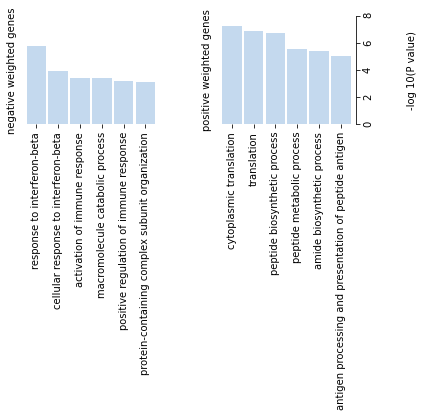

In [6]:
### plot selected GO terms and assigned p-values
fig, axs = plt.subplots(1, len(p_values), figsize=(3*len(p_values), 2),
                        gridspec_kw={'wspace':0.4})

axs = axs.ravel()

for idx, key in enumerate(p_values):
    p_values[key].plot(kind="bar", ax=axs[idx], width=0.9, color="#C4D9EE")
    axs[idx].set_ylabel(key+' weighted genes')

ymin = 0
ymax = int(math.ceil(max([max(p_values[key]) for key in p_values])))
    
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim([ymin, ymax])
    ax.yaxis.tick_right()
    for tick in ax.get_yticklabels():
        tick.set_rotation(90)

for i in range(len(p_values)-1):
    axs[i].set_yticks([])
    axs[i].spines['right'].set_visible(False)

# add title
plt.text(1.4, 0.5, "-log 10(P value)",ha='center',va='center', 
         transform=ax.transAxes, rotation='vertical')
    
# save figure
save_path = "../figures/3.8.GO-terms_pseudotime_weighted_genes.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()